# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('boston_data.csv')
print(data.shape)
data.head()

(404, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [45]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [46]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [47]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


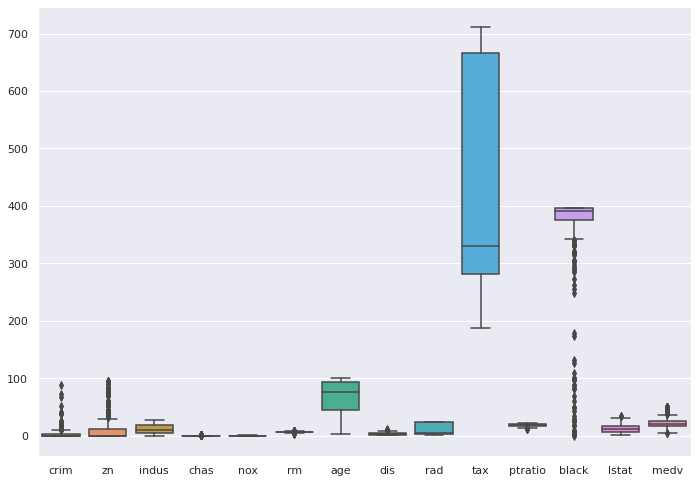

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(data=data)

In [49]:
data['crim'].sort_values(ascending=False).head(20)

380    88.9762
285    73.5341
114    67.9208
400    51.1358
116    41.5292
34     38.3518
273    37.6619
10     25.9406
377    25.0461
143    24.3938
50     23.6482
177    20.7162
167    20.0849
281    19.6091
258    18.8110
62     18.0846
60     17.8667
261    16.8118
260    15.8744
304    15.8603
Name: crim, dtype: float64

In [50]:
data['black'][data['black']<100].sort_values(ascending=False)

146    97.95
374    96.73
290    88.63
47     88.01
310    83.45
8      81.33
170    68.95
20     60.72
312    50.92
246    48.45
196    43.06
141    35.05
258    28.79
355    27.49
62     27.25
184    24.65
273    18.82
285    16.45
38     10.48
14      9.32
304     7.68
333     6.68
214     3.65
91      3.50
400     2.60
223     2.52
241     0.32
Name: black, dtype: float64

In [51]:
data['crim'].sort_values(ascending=False).head(10)

380    88.9762
285    73.5341
114    67.9208
400    51.1358
116    41.5292
34     38.3518
273    37.6619
10     25.9406
377    25.0461
143    24.3938
Name: crim, dtype: float64

In [52]:
data['zn'].sort_values(ascending=False).head(10)

57     95.0
160    95.0
101    95.0
111    90.0
401    90.0
402    85.0
232    85.0
53     82.5
70     82.5
106    80.0
Name: zn, dtype: float64

In [53]:
data = data.drop([380,285,114,400,116], axis=0)
# I decide to drop some rows, not many of them, as outliers are close to each other and the data size is small

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [54]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.252064,0.522327,-0.061116,0.532253,-0.240352,0.437475,-0.468383,0.774085,0.725828,0.364794,-0.458322,0.570627,-0.457120
zn,-0.252064,1.000000,-0.530386,-0.038996,-0.495233,0.301490,-0.544926,0.658331,-0.307146,-0.284814,-0.368497,0.174416,-0.411055,0.352405
indus,0.522327,-0.530386,1.000000,0.063843,0.758498,-0.351545,0.625671,-0.698496,0.609764,0.718527,0.349875,-0.376087,0.605840,-0.493376
chas,-0.061116,-0.038996,0.063843,1.000000,0.104544,0.089001,0.088706,-0.107639,-0.017362,-0.039184,-0.119597,0.039274,-0.038004,0.138462
nox,0.532253,-0.495233,0.758498,0.104544,1.000000,-0.263422,0.726745,-0.760095,0.606772,0.656240,0.158741,-0.398485,0.582553,-0.429569
rm,-0.240352,0.301490,-0.351545,0.089001,-0.263422,1.000000,-0.206948,0.174578,-0.167165,-0.237319,-0.321393,0.119892,-0.578600,0.687337
age,0.437475,-0.544926,0.625671,0.088706,0.726745,-0.206948,1.000000,-0.731735,0.458252,0.495847,0.224298,-0.268138,0.601110,-0.381202
dis,-0.468383,0.658331,-0.698496,-0.107639,-0.760095,0.174578,-0.731735,1.000000,-0.493414,-0.517846,-0.197261,0.301242,-0.496503,0.250775
rad,0.774085,-0.307146,0.609764,-0.017362,0.606772,-0.167165,0.458252,-0.493414,1.000000,0.914876,0.481108,-0.464481,0.492056,-0.406643
tax,0.725828,-0.284814,0.718527,-0.039184,0.656240,-0.237319,0.495847,-0.517846,0.914876,1.000000,0.459067,-0.458724,0.536998,-0.482227


Text(0.5, 1.0, 'Correlation Heatmap')

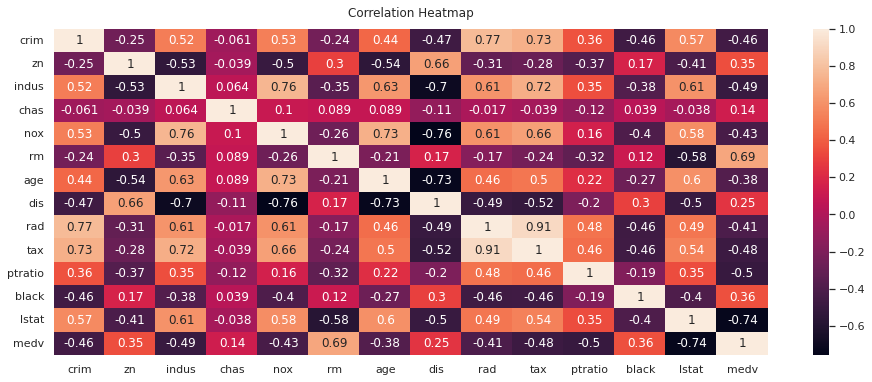

In [55]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

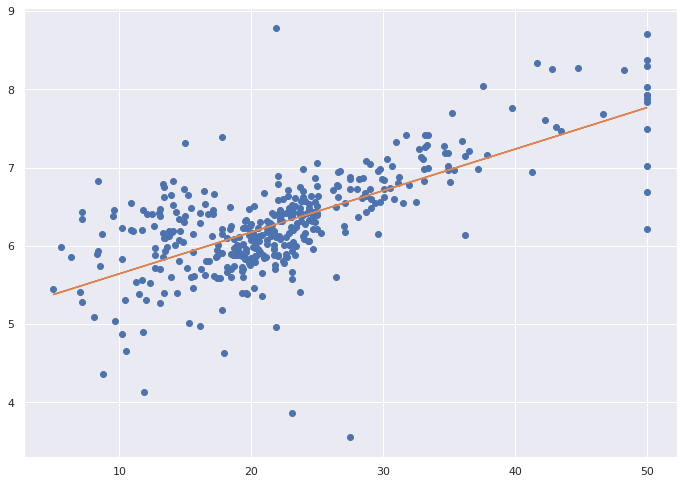

In [56]:
plt.plot(data['medv'] ,data['rm'] , 'o')

m, b = np.polyfit(data['medv'] ,data['rm'], 1)

plt.plot(data['medv'], m*data['medv']+b)

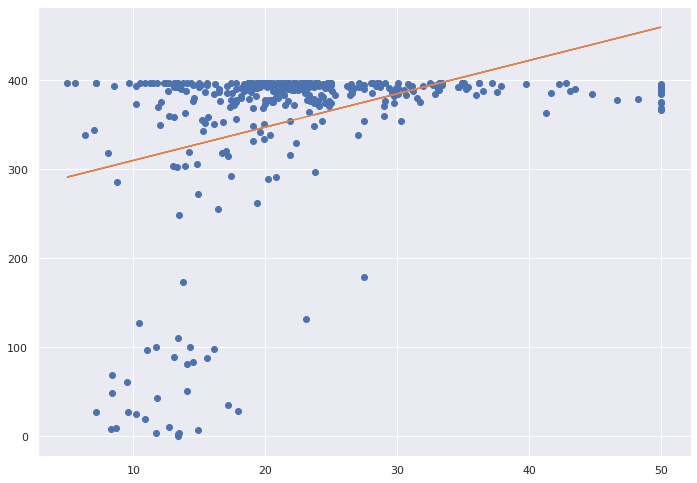

In [57]:
plt.plot(data['medv'],data['black'] , 'o')

m, b = np.polyfit(data['medv'],data['black'], 1)

plt.plot(data['medv'], m*data['medv']+b)

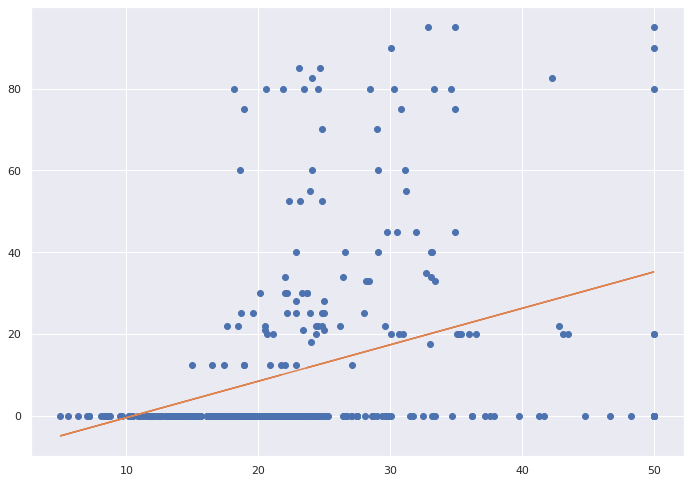

In [58]:
plt.plot(data['medv'],data['zn'] , 'o')

m, b = np.polyfit(data['medv'],data['zn'], 1)

plt.plot(data['medv'], m*data['medv']+b)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [59]:
'''
The strongest correlation value is between medv and rm, we can see how medv increase as rm does.
The other two values with higher correlation value then 0.30 have not that relationship between them. they look quite plain.
'''

'\nThe strongest correlation value is between medv and rm, we can see how medv increase as rm does.\nThe other two values with higher correlation value then 0.30 have not that relationship between them. they look quite plain.\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [60]:
data_drop = data.drop(columns=['rm', 'black', 'zn'])
data_drop

,crim,indus,chas,nox,age,dis,rad,tax,ptratio,lstat,medv
0,0.15876,10.81,0.0,0.413,17.5,5.2873,4.0,305.0,19.2,9.88,21.7
1,0.10328,5.13,0.0,0.453,47.2,6.9320,8.0,284.0,19.7,9.22,19.6
2,0.34940,9.90,0.0,0.544,76.7,3.1025,4.0,304.0,18.4,9.97,20.3
3,2.73397,19.58,0.0,0.871,94.9,1.5257,5.0,403.0,14.7,21.45,15.4
4,0.04337,5.64,0.0,0.439,63.0,6.8147,4.0,243.0,16.8,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...
398,0.67191,8.14,0.0,0.538,90.3,4.6820,4.0,307.0,21.0,14.81,16.6
399,9.32909,18.10,0.0,0.713,98.7,2.2616,24.0,666.0,20.2,18.13,14.1
401,0.01501,1.21,1.0,0.401,24.8,5.8850,1.0,198.0,13.6,3.16,50.0
402,0.02055,0.74,0.0,0.410,35.7,9.1876,2.0,313.0,17.3,5.77,24.7


Text(0.5, 1.0, 'Correlation Heatmap')

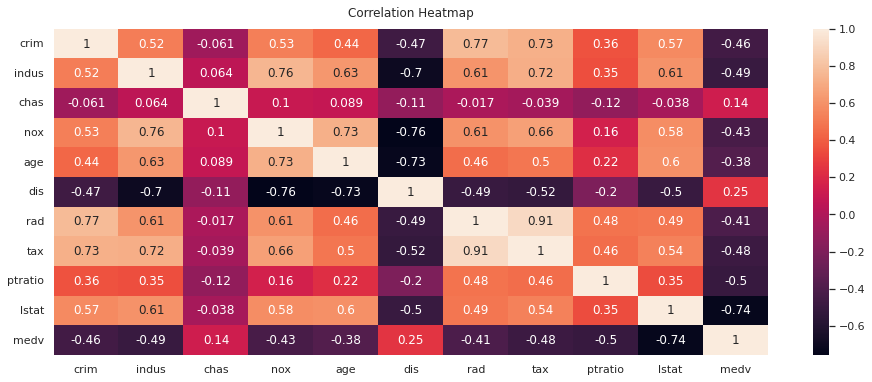

In [61]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data_drop.corr(), annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [62]:
'''
Maybe dis value.
'''

'\nMaybe dis value.\n'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [63]:
data['medv'].describe()

count    399.000000
mean      22.472431
std        8.767338
min        5.000000
25%       17.350000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [64]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [65]:
X = data.drop(columns='medv')
y = data['medv'] 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

### Normalization

In [67]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [68]:
X_train_normalized = normalizer.transform(X_train) 
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns)
X_train_normalized.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.001412,0.000000,0.073314,0.0,0.200418,0.496647,0.667377,0.192619,0.086957,0.011450,0.553191,0.975314,0.349877
1,0.000931,0.294737,0.534457,0.0,0.150313,0.552021,0.505330,0.227864,0.130435,0.158397,0.595745,0.995234,0.196998
2,0.149296,0.000000,0.646628,0.0,0.292276,0.670627,0.754797,0.204565,1.000000,0.914122,0.808511,0.995915,0.161765
3,0.000227,0.842105,0.056818,0.0,0.089770,0.589002,0.250533,0.654799,0.130435,0.177481,0.468085,0.984972,0.130515
4,0.014838,0.000000,0.210411,0.0,0.240084,0.915118,0.715352,0.243607,0.304348,0.229008,0.510638,0.972288,0.022672


In [69]:
y_train=y_train.reset_index(drop=True)

In [70]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns)
X_test_normalized.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.132580,0.000000,0.646628,0.0,0.670146,0.524238,0.912580,0.109433,1.000000,0.914122,0.808511,0.970220,0.476103
1,0.123771,0.000000,0.646628,0.0,0.670146,0.567925,0.856077,0.115602,1.000000,0.914122,0.808511,0.127591,0.502451
2,0.000748,0.842105,0.164589,0.0,0.039666,0.632305,0.231343,0.360268,0.130435,0.110687,0.702128,1.000000,0.049020
3,0.033045,0.000000,0.700880,1.0,0.444676,0.515233,0.921109,0.057432,0.173913,0.412214,0.223404,0.853800,0.115502
4,0.000789,0.263158,0.161290,0.0,0.070981,0.525196,0.277186,0.386187,0.130435,0.179389,0.680851,1.000000,0.152880


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [71]:
from sklearn.ensemble import RandomForestRegressor

Random_forest2 = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=2, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
Random_forest2.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=2, n_estimators=10, random_state=1)

In [72]:
Random_forest4 = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=4, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
Random_forest4.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=1)

In [73]:
Random_forest6 = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=6, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
Random_forest6.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=1)

In [74]:
Random_forest8 = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=8, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
Random_forest8.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=8, n_estimators=10, random_state=1)

In [75]:
Random_forest10 = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=10, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
Random_forest10.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=1)

In [76]:
# Five separate RFR here with the given max depths

Now, plot the score for each tree on the training set and on the testing set.

In [80]:
test_score2 = Random_forest2.score(X_test_normalized,y_test)
train_score2 = Random_forest2.score(X_train_normalized, y_train)

test_score4 = Random_forest4.score(X_test_normalized,y_test)
train_score4 = Random_forest4.score(X_train_normalized, y_train)

test_score6 = Random_forest6.score(X_test_normalized,y_test)
train_score6 = Random_forest6.score(X_train_normalized, y_train)

test_score8 = Random_forest8.score(X_test_normalized,y_test)
train_score8 = Random_forest8.score(X_train_normalized, y_train)

test_score10 = Random_forest10.score(X_test_normalized,y_test)
train_score10 = Random_forest10.score(X_train_normalized, y_train)

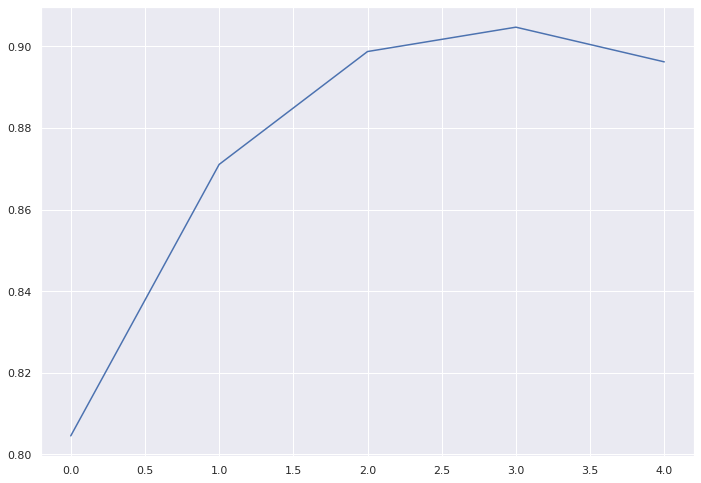

In [81]:
plt.plot([test_score2,test_score4,test_score6,test_score8,test_score10])
plt.show()

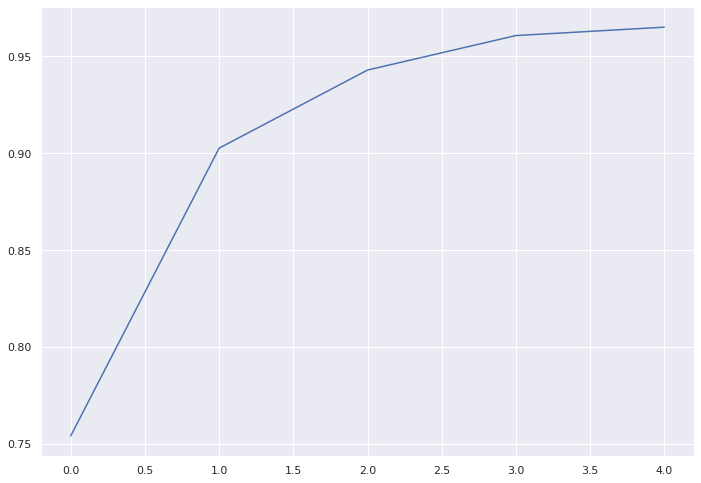

In [82]:
plt.plot([train_score2,train_score4,train_score6,train_score8,train_score10])
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [83]:
'''
That the optimal depth is 8
'''

'\nThat the optimal depth is 8\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [85]:
'''
With a max depth of 1 the model will be underfitting, so there would be high bias and low variance.
The model with a max depth of 10 is overfitting so it has low bias and high variance.
'''

'\nWith a max depth of 1 the model will be underfitting, so there would be high bias and low variance.\nThe model with a max depth of 10 is overfitting so it has low bias and high variance.\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [86]:
'''
As we check previously max depth of 8 is the best value.
'''

'\nAs we check previously max depth of 8 is the best value.\n'

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [87]:
from sklearn.datasets import load_boston
boston_features = load_boston()
print(boston_features.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [88]:
'''
Data from this model is pretty old, so if we try to predict house values with these features, we will be wrong for sure
'''

'\nData from this model is pretty old, so if we try to predict house values with these features, we will be wrong for sure\n'